In [1]:
#Import required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data Sets

spend = pd.read_csv('spend.csv')
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [3]:
#checking for row duplicates

print("Customer Spend:")
spend.duplicated().sum()

Customer Spend:


0

In [4]:
# checking for null values
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [5]:
#Exploratory Data Analysis
print(spend.shape)
spend.describe()

(1500, 5)


,Sl No:,Amount
count,1500.000000,1500.000000
mean,750.500000,243096.049460
std,433.157015,141349.547367
min,1.000000,720.300000
25%,375.750000,122606.487500
50%,750.500000,239210.360000
75%,1125.250000,361617.632500
max,1500.000000,499793.490000


In [6]:
#converting Month column to standard date time format
spend.Month = pd.to_datetime(spend.Month)
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [7]:
#creating new columns which will break out Month and Year
spend['by_month'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['by_year'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [8]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,by_month,by_year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


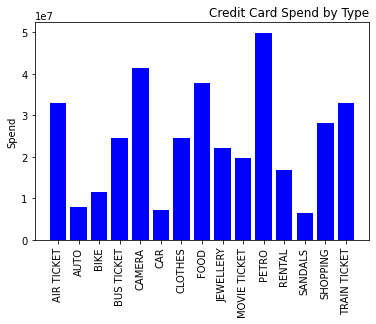

In [9]:
#create analysis of spend by category type

spend_type = spend.groupby('Type')['Amount'].sum();
spend_type.head();
plt.bar(spend_type.index, spend_type, color='blue');
plt.xticks(rotation=90);
plt.ylabel("Spend");
plt.title("Credit Card Spend by Type", loc='right', size=12);

In [31]:
# analysis of spend by type by year
spend_type1=spend.groupby(['by_year','Type'])[['Amount']].sum()
spend_wide=spend_type1.pivot_table(index='Type',columns='by_year',values='Amount')

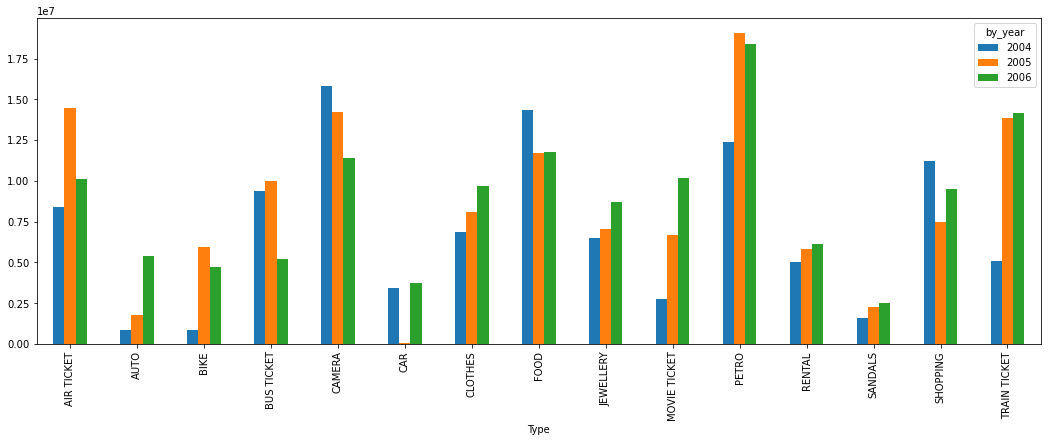

In [32]:
spend_wide.plot(kind='bar',figsize=(18,6))
plt.show()

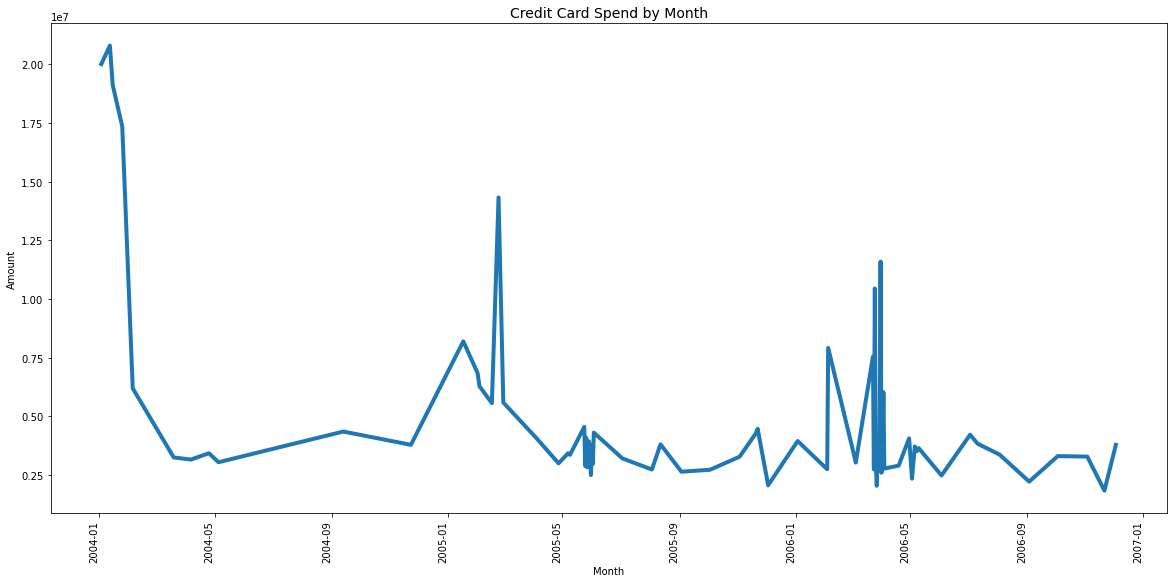

In [10]:
#create analysis and plot daily spend 

spend_mth= spend.groupby('Month')['Amount'].sum()
spend_mth.plot(linewidth=4, figsize= (20,10))
plt.xticks(rotation=90);
plt.ylabel("Amount");
plt.title("Credit Card Spend by Month", loc='center', size=14);



Text(0.5, 1.0, 'Credit Card Spend by Month')

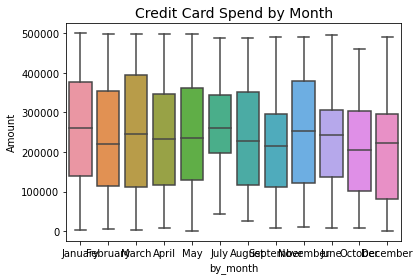

In [11]:
#create analysis of spend by month and box plot


sns.boxplot(data=spend, x='by_month', y='Amount')
plt.title("Credit Card Spend by Month", loc='center', size=14,)

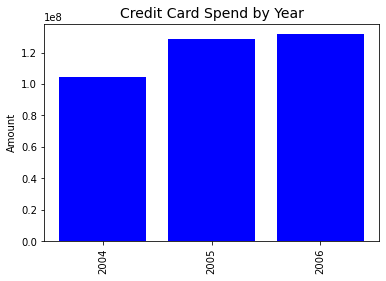

In [12]:
#create analysis of spend by year

spend_yr = spend.groupby('by_year')['Amount'].sum()
plt.bar(spend_yr.index, spend_yr, color='blue')
plt.xticks(rotation=90);
plt.ylabel("Amount");
plt.title("Credit Card Spend by Year", loc='center', size=14);

In [13]:
# Comparison of yearly spend on petro (largest spend category)

petro = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered = petro.loc[petro["Type"]=="PETRO"]
filtered

,by_year,Type,Amount
10,2004,PETRO,12406782.86
25,2005,PETRO,19045589.11
40,2006,PETRO,18410802.12


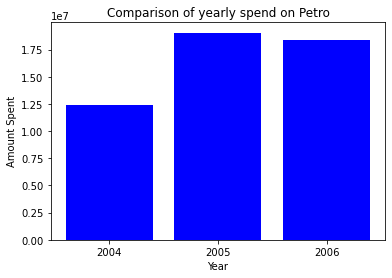

In [14]:
#create bar chart of spend on Petro by year
plt.bar(filtered["by_year"],height=filtered["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on Petro")
plt.show()

In [15]:
# Comparison of yearly spend on cameras (second largest spend category)
camera = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_c = camera.loc[camera["Type"]=="CAMERA"]
filtered_c

,by_year,Type,Amount
4,2004,CAMERA,15808342.75
19,2005,CAMERA,14246199.07
34,2006,CAMERA,11427030.14


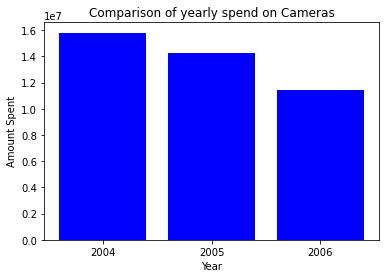

In [16]:
#create bar chart of spend on Cameras  by year

plt.bar(filtered_c["by_year"],height=filtered_c["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on Cameras")
plt.show()

In [17]:
# Comparison of yearly spend on air tickets - third largest spend category
air = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_a = air.loc[camera["Type"]=="AIR TICKET"]
filtered_a

,by_year,Type,Amount
0,2004,AIR TICKET,8370914.59
15,2005,AIR TICKET,14495718.73
30,2006,AIR TICKET,10088812.10


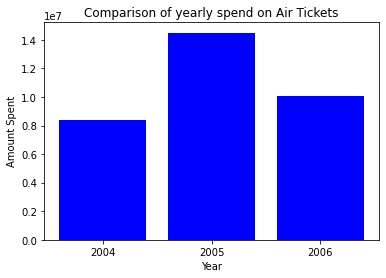

In [18]:
#create bar chart of spend on air tickets by year

plt.bar(filtered_a["by_year"],height=filtered_a["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on Air Tickets")
plt.show()

In [19]:
# Comparison of yearly spend on food - fourth largest spend category
food = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_f = food.loc[food["Type"]=="FOOD"]
filtered_f

,by_year,Type,Amount
7,2004,FOOD,14331230.55
22,2005,FOOD,11679385.25
37,2006,FOOD,11762722.63


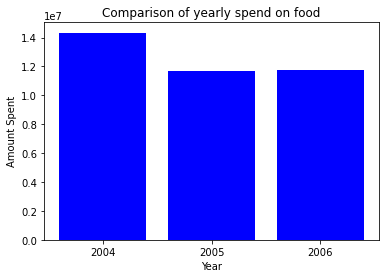

In [20]:
#create bar chart of spend on food by year

plt.bar(filtered_f["by_year"],height=filtered_f["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on food")
plt.show()

In [21]:
# Comparison of yearly spend on train 
train = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_t = train.loc[train["Type"]=="TRAIN TICKET"]
filtered_t

,by_year,Type,Amount
14,2004,TRAIN TICKET,5079275.84
29,2005,TRAIN TICKET,13829647.60
44,2006,TRAIN TICKET,14158153.71


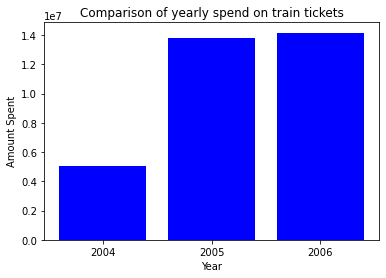

In [22]:
#create bar chart of spend on trains by year

plt.bar(filtered_t["by_year"],height=filtered_t["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on train tickets")
plt.show()

In [23]:
# Comparison of yearly spend on movie ticket 
movie = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_mv = movie.loc[movie["Type"]=="MOVIE TICKET"]
filtered_mv

,by_year,Type,Amount
9,2004,MOVIE TICKET,2749815.43
24,2005,MOVIE TICKET,6706076.61
39,2006,MOVIE TICKET,10188937.89


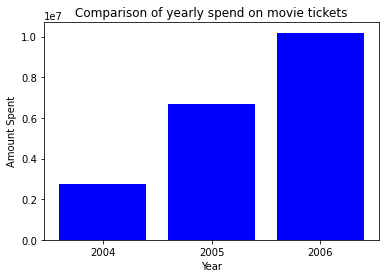

In [24]:
#create bar chart of spend on movie ticket

plt.bar(filtered_mv["by_year"],height=filtered_mv["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on movie tickets")
plt.show()

In [25]:
# Comparison of yearly spend on auto 
auto = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_au = auto.loc[auto["Type"]=="AUTO"]
filtered_au

,by_year,Type,Amount
1,2004,AUTO,837121.32
16,2005,AUTO,1756945.98
31,2006,AUTO,5414016.74


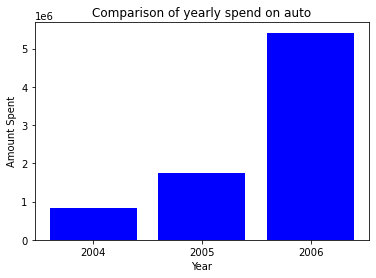

In [26]:
#create bar chart of spend on auto

plt.bar(filtered_au["by_year"],height=filtered_au["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on auto")
plt.show()

In [27]:
# Comparison of yearly spend on car 
car = spend.groupby(["by_year","Type"])[["Amount"]].sum().reset_index()
filtered_ca = car.loc[auto["Type"]=="CAR"]
filtered_ca

,by_year,Type,Amount
5,2004,CAR,3458008.80
20,2005,CAR,74247.30
35,2006,CAR,3748068.79


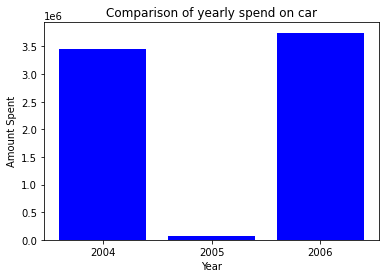

In [28]:
#create bar chart of spend on car

plt.bar(filtered_ca["by_year"],height=filtered_ca["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on car")
plt.show()

In [61]:
# analysis of spend by a customer

spend_cust = spend.groupby('Customer')['Amount'].sum();
spend_cust.head()


Customer
A1      5142702.76
A10     3847424.65
A100     224786.88
A11     4517227.69
A12     8183050.64
Name: Amount, dtype: float64

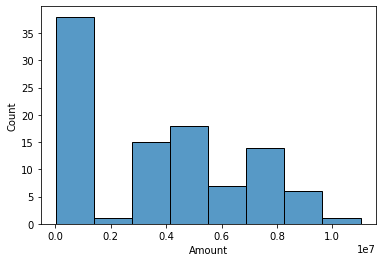

In [78]:
fig.suptitle("Spend Distribution", fontsize=25)
sns.histplot(spend_cust);

In [90]:
# analysis of transactions by customer

txns_cust = spend.groupby('Customer')['Sl No:'].count();
txns_cust.head()

Customer
A1      18
A10     18
A100     1
A11     18
A12     31
Name: Sl No:, dtype: int64

<AxesSubplot:xlabel='Sl No:', ylabel='Count'>

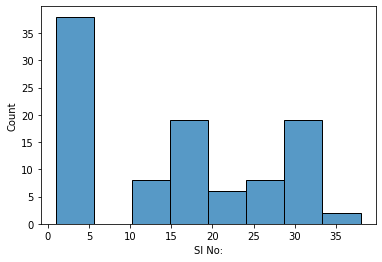

In [93]:
fig.suptitle("Transactions Distribution by customer", fontsize=25)
sns.histplot(txns_cust)